In [26]:
import sys
import tomotopy as tp
import numpy as np

In [30]:
def train_topic_model(corpus):
    perplexities = []
    ll_per_words = []
    path = f'C:/Users/yuuta/Documents/fashion/model_learning/topic_model/models/'
    max_ll = None
    max_perplexity = None
    # mdl = tp.HPAModel(tw=tp.TermWeight.ONE, k=topic_num)
    for eta in np.arange(0.001, 0.03, 0.001):
        mdl = tp.CTModel(tw=tp.TermWeight.ONE, k=8, eta=eta)
        mdl.add_corpus(corpus)
        mdl.train(0)
        for i in range(0, 500, 20):
            mdl.train(20)
            # mdl.perplexityは小さいほうがいい、mdl.ll_per_wordは大きいほうがいい
            if i % 100 == 0:
                print('\r' + 'eta: {} Iteration: {}\tll_per_word: {}\t perplexity: {}'.format(eta, i, mdl.ll_per_word, mdl.perplexity), end='')
        print()
        # mdl.summary()
        save_flag = False
        perplexities.append(mdl.perplexity)
        ll_per_words.append(mdl.ll_per_word)
        if max_ll == None or mdl.ll_per_word > max_ll:
            max_ll = mdl.ll_per_word
            save_flag = True
        if max_perplexity == None or mdl.perplexity < max_perplexity:
            max_perplexity = mdl.perplexity
            save_flag = True
        if save_flag:
            print('Saving...', file=sys.stderr, flush=True)
            print('mdl.perplexity: ', mdl.perplexity, ' ', 'mdl.ll_per_word: ', mdl.ll_per_word)
            mdl.save(path + f'ctm-topic_num_8_eta_{eta}.bin', True)
    return perplexities, ll_per_words
    # for k in range(mdl.k):
    #     print('Topic #{}'.format(k))
    #     for word, prob in mdl.get_topic_words(k):
    #         print('\t', word, prob, sep='\t')

In [31]:
# C:/Users/yuuta/Documents/fashion/data/images
with open('C:/Users/yuuta/Documents/fashion/model_learning/topic_model/train.txt', 'r', encoding="utf-8") as f:
    input_lines = f.read().splitlines()

print('Running CTM')

corpus = tp.utils.Corpus()
for line in input_lines:
    line = list(map(lambda x: x.strip(), line.split(','))) 
    corpus.add_doc(line)
    
perplexities, ll_per_words = train_topic_model(corpus)

Running CTM
eta: 0.001 Iteration: 400	ll_per_word: -7.526324540357452	 perplexity: 1856.2703034142455

Saving...



mdl.perplexity:  1778.1037817073739   mdl.ll_per_word:  -7.483302784284551
eta: 0.002 Iteration: 0	ll_per_word: -6.43698934346274	 perplexity: 624.523740129968Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\yuuta\anaconda3\envs\fashion\Lib\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\yuuta\AppData\Local\Temp\ipykernel_5820\424083366.py", line 12, in <module>
    perplexities, ll_per_words = train_topic_model(corpus)
                                 ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\yuuta\AppData\Local\Temp\ipykernel_5820\1594959079.py", line -1, in train_topic_model
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\yuuta\anaconda3\envs\fashion\Lib\site-packages\IPython\core\interactiveshell.py", line 2144, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\yuuta\anaconda3\envs\fashion\Lib\site-packages\IPython\core\ultratb.py", line 1435, in structured_tracebac

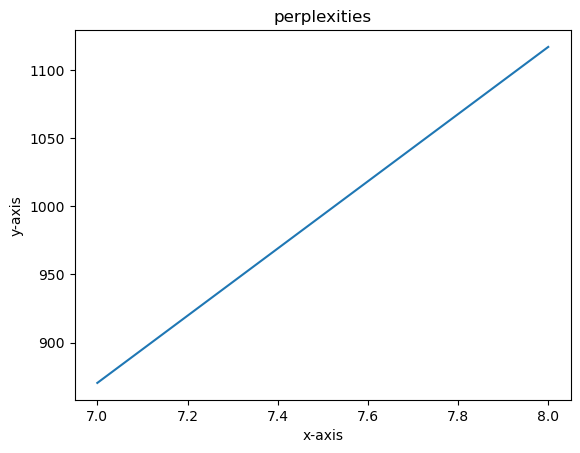

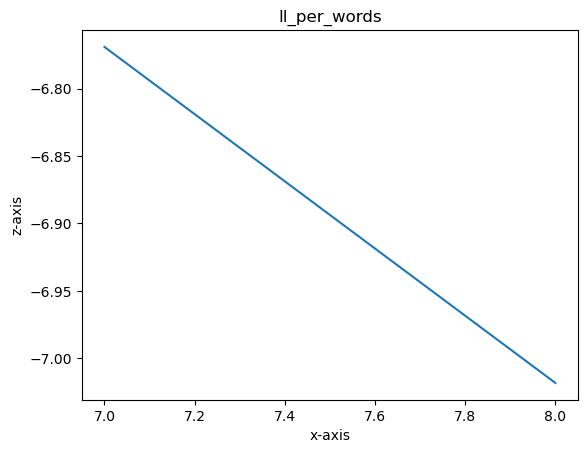

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def plot_2d_graph(x, y, z, prefix=''):
    save_path = 'C:/Users/yuuta/Documents/fashion/model_learning/topic_model/images/'
    # 1つ目のグラフ
    plt.figure(1)
    plt.plot(x, y)
    plt.title('perplexities')
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')

    plt.savefig(save_path + f'{prefix}perplexities.png')

    # 2つ目のグラフ
    plt.figure(2)
    plt.plot(x, z)
    plt.title('ll_per_words')
    plt.xlabel('x-axis')
    plt.ylabel('z-axis')

    plt.savefig(save_path + f'{prefix}ll_per_words.png')

    # グラフの表示
    plt.show()
plot_2d_graph(list(range(7, 9, 1)), perplexities, ll_per_words, prefix='ctm-7-9-')